In [1]:
#essential libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import seaborn as sb
from matplotlib.cm import rainbow

In [2]:
pwd # dictionary path 

'C:\\Users\\yashs\\project'

In [3]:
#because heart_disease_present column present in label file is target for our project so we have to merge 2 csv files given.
#We renamed label file as heart target and values file as heart values
#Importing data
df1=pd.read_csv('heart values.csv')
df2=pd.read_csv('heart target.csv')
merged=pd.merge(df1,df2, on='patient_id')
merged.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [4]:
#Basic checks and EDA

In [5]:
#Verifying type of file
type(merged)

pandas.core.frame.DataFrame

In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
merged.shape

(180, 15)

In [8]:
merged.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [9]:
merged.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [10]:
#Analysis of 'target' variab
df2.describe()

,heart_disease_present
count,180.000000
mean,0.444444
std,0.498290
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
df2.isnull().sum()

patient_id               0
heart_disease_present    0
dtype: int64

In [12]:
merged.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255


In [13]:
# Corelation between columns
#abs() function gives absolute values 
#"heart_disease_present" column is our target.
print(merged.corr()["heart_disease_present"].abs().sort_values(ascending=False))

heart_disease_present                   1.000000
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
max_heart_rate_achieved                 0.375352
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
Name: heart_disease_present, dtype: float64


### Indicates that fasting_blood_sugar_gt_120_mg_per_dl column weakly corelated.

array([[<AxesSubplot:title={'center':'slope_of_peak_exercise_st_segment'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'num_major_vessels'}>],
       [<AxesSubplot:title={'center':'fasting_blood_sugar_gt_120_mg_per_dl'}>,
        <AxesSubplot:title={'center':'resting_ekg_results'}>,
        <AxesSubplot:title={'center':'serum_cholesterol_mg_per_dl'}>,
        <AxesSubplot:title={'center':'oldpeak_eq_st_depression'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'max_heart_rate_achieved'}>,
        <AxesSubplot:title={'center':'exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'heart_disease_present'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

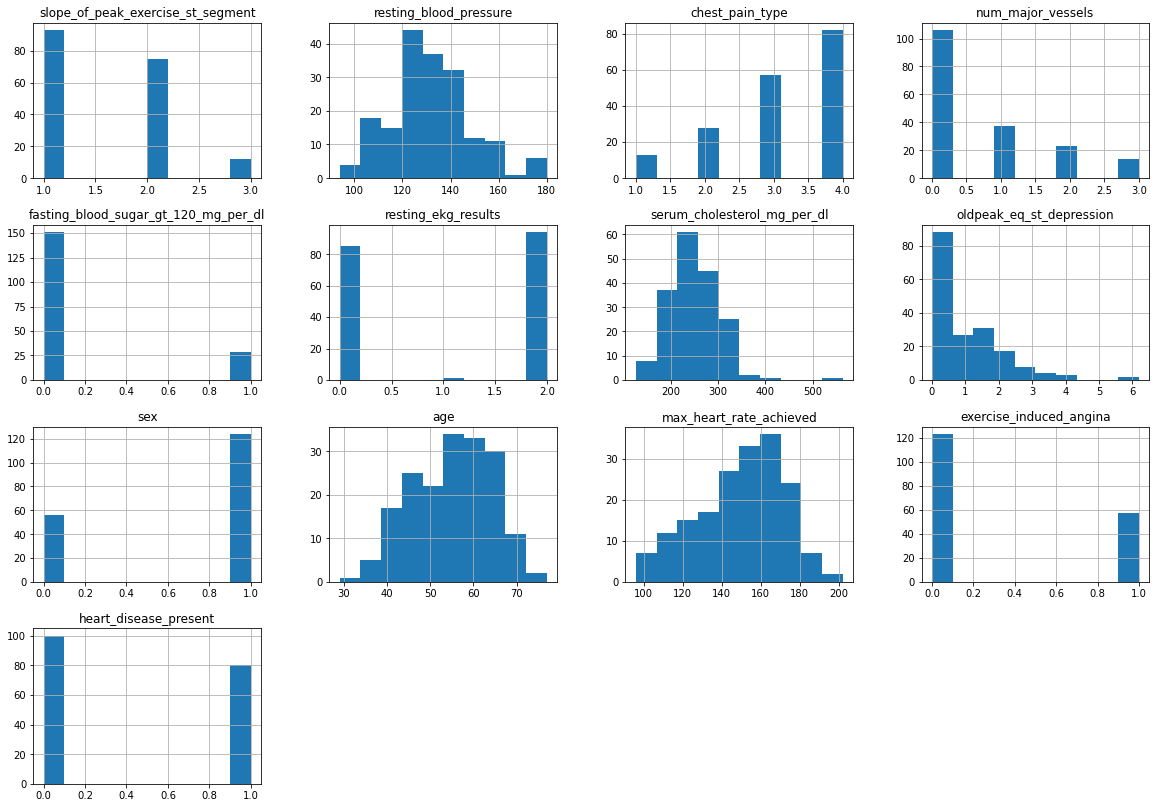

In [14]:
rcParams['figure.figsize'] = 20, 14
merged.hist()

<AxesSubplot:>

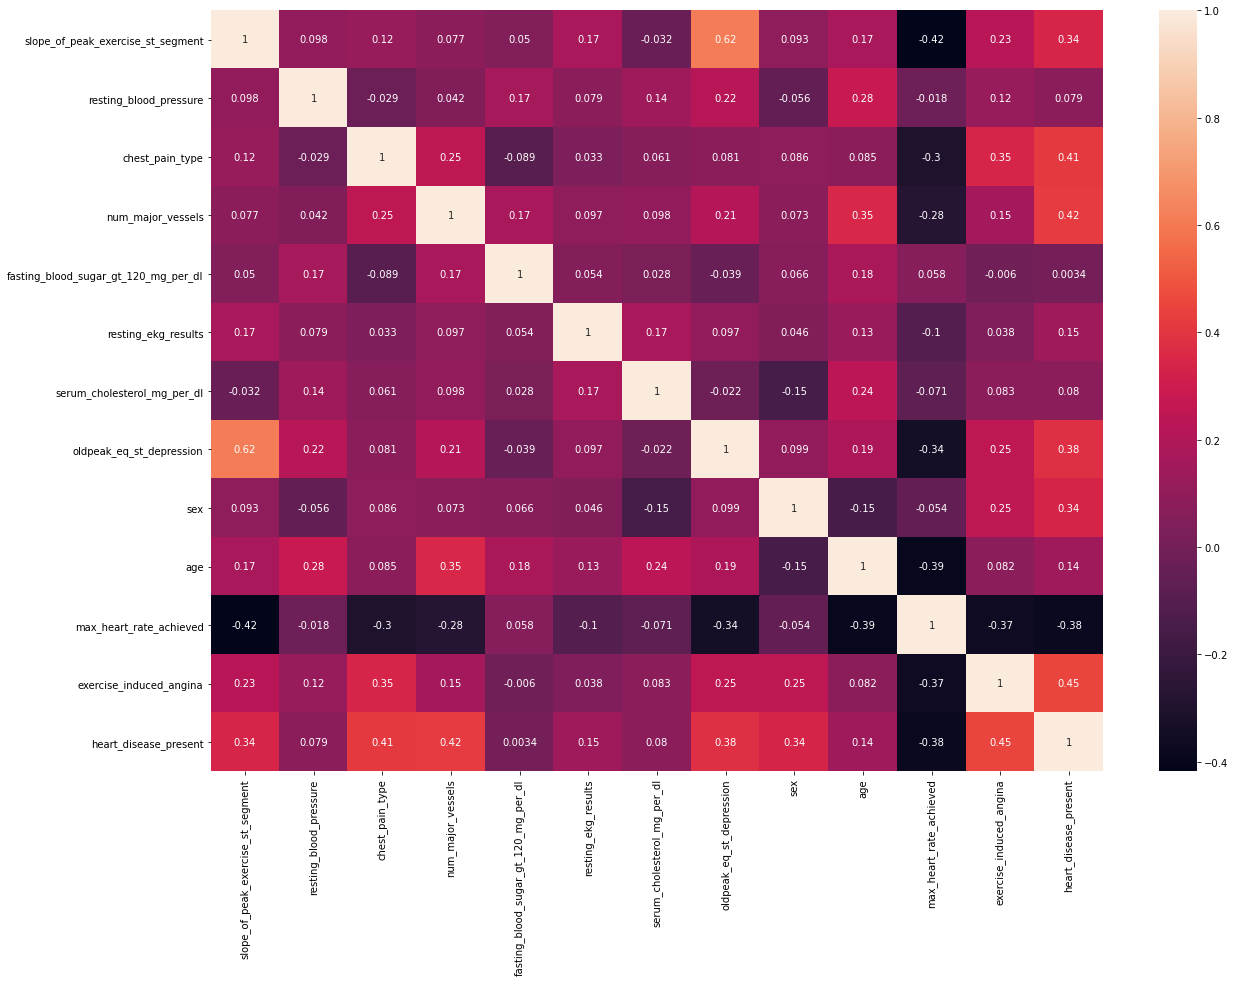

In [15]:
#this heatmap shows graphical representation of correlation matrix.
sb.heatmap(merged.corr(),annot=True)

## Exploratory Data Analysis (EDA)

### analysis of target

C:\Users\yashs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    100
1     80
Name: heart_disease_present, dtype: int64


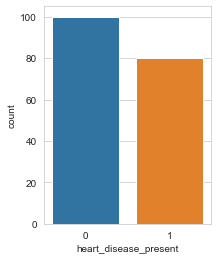

In [16]:
rcParams['figure.figsize'] = 3,4
sb.set_style('whitegrid')
y = merged["heart_disease_present"]
sns.countplot(y)
target_temp = merged.heart_disease_present.value_counts()
print(target_temp)

### Analysing the sex feature

In [17]:
merged["sex"].unique()

array([1, 0], dtype=int64)

1    124
0     56
Name: sex, dtype: int64


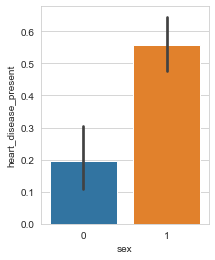

In [18]:
rcParams['figure.figsize'] = 3,4
sns.barplot(x='sex',y='heart_disease_present',data=merged)
sex_count = merged.sex.value_counts()
print(sex_count)

#Indicates that males have more heart problems than females 0:female 1:male

### Analysis the Slope feature

In [19]:
merged["slope_of_peak_exercise_st_segment"].unique()

array([1, 2, 3], dtype=int64)

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64


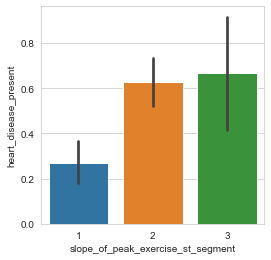

In [20]:
rcParams['figure.figsize'] = 4,4
sns.barplot(x='slope_of_peak_exercise_st_segment',y='heart_disease_present',data=merged)
slope_count = merged.slope_of_peak_exercise_st_segment.value_counts()
print(slope_count)

### Analysis the chest_pain_type

In [21]:
merged["chest_pain_type"].unique()

array([2, 3, 4, 1], dtype=int64)

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64


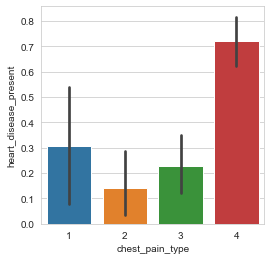

In [22]:
rcParams['figure.figsize'] = 4,4
sns.barplot(x='chest_pain_type',y='heart_disease_present',data=merged)
slope_count = merged.chest_pain_type.value_counts()
print(slope_count)

##### indicates that chest pain of '4', i.e. the ones more likely to have heart problems

### Analysis of num_major_vessels feature

In [23]:
merged["num_major_vessels"].unique()

array([0, 3, 2, 1], dtype=int64)

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64


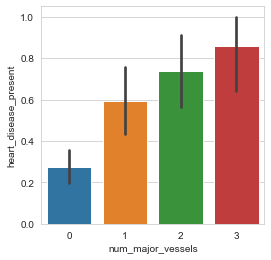

In [24]:
rcParams['figure.figsize'] = 4,4
sns.barplot(x='num_major_vessels',y='heart_disease_present',data=merged)
slope_count = merged.num_major_vessels.value_counts()
print(slope_count)

#### indicates that chest_pain_type =3 has large number of heart patients

### Analysis of resting_ekg_results feature

In [25]:
merged["resting_ekg_results"].unique()

array([2, 0, 1], dtype=int64)

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64


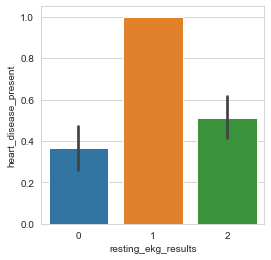

In [26]:
rcParams['figure.figsize'] = 4,4
sns.barplot(x='resting_ekg_results',y='heart_disease_present',data=merged)
slope_count = merged.resting_ekg_results.value_counts()
print(slope_count)

#### indicates that people with resting_ekg_results '1' are more likely to have a heart disease 

### Analysis of exercise_induced_angina feature

In [27]:
merged["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

0    123
1     57
Name: exercise_induced_angina, dtype: int64


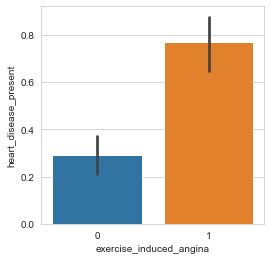

In [28]:
rcParams['figure.figsize'] = 4,4
sns.barplot(x='exercise_induced_angina',y='heart_disease_present',data=merged)
slope_count = merged.exercise_induced_angina.value_counts()
print(slope_count)

#### indicates that people with exercise_induced_angina=1 i.e. Exercise induced angina are much more likely to have heart problems

In [29]:
#convert catogarical variables in dummy variable
Dataset=pd.get_dummies(merged,columns=["slope_of_peak_exercise_st_segment","thal","chest_pain_type","num_major_vessels","fasting_blood_sugar_gt_120_mg_per_dl","resting_ekg_results","sex","exercise_induced_angina"],drop_first=True)

In [30]:
Dataset

,patient_id,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,heart_disease_present,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_normal,...,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_1,resting_ekg_results_2,sex_1,exercise_induced_angina_1
0,0z64un,128,308,0.0,45,170,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,ryoo3j,110,214,1.6,54,158,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,yt1s1x,125,304,0.0,77,162,1,0,0,1,...,0,1,0,0,1,0,0,1,1,1
3,l2xjde,152,223,0.0,40,181,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,oyt4ek,178,270,4.2,59,145,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,125,254,0.2,67,163,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
176,2s2b1f,180,327,3.4,55,117,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1
177,nsd00i,125,309,1.8,64,131,1,1,0,0,...,1,0,0,0,0,0,0,0,1,1
178,0xw93k,124,255,0.0,48,175,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [31]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved']
Dataset[columns_to_scale] = standardScaler.fit_transform(Dataset[columns_to_scale])

# #Train Test Split

In [32]:
X=Dataset.drop(columns=['patient_id','heart_disease_present'])
Y=Dataset.heart_disease_present

In [33]:
#Train-Test-Split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
X_train.shape

(144, 20)

In [35]:
X_test.shape

(36, 20)

In [36]:
y_train.shape

(144,)

In [37]:
y_test.shape

(36,)

## #LOGISTIC REGRESSION

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_LogReg_predict = model.predict(X_test)

In [41]:
y_LogReg_predict.shape

(36,)

In [42]:
LogReg_score=round(accuracy_score(y_test,y_LogReg_predict)*100,2)
print(f"Logistic Regression Accuracy Score is {LogReg_score} %")

Logistic Regression Accuracy Score is 80.56 %


In [43]:
pd.crosstab(y_test,y_LogReg_predict)

col_0,0,1
heart_disease_present,,
0,17,7
1,0,12


In [44]:
precision_score(y_test,y_LogReg_predict)

0.631578947368421

In [45]:
recall_score(y_test,y_LogReg_predict)

1.0

In [46]:
print(classification_report(y_test,y_LogReg_predict))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.63      1.00      0.77        12

    accuracy                           0.81        36
   macro avg       0.82      0.85      0.80        36
weighted avg       0.88      0.81      0.81        36



### Logistic Regression Accuracy Score is 80.56 %

# #KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
KNN_scores=[]
for k in range (1,21):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train, y_train)
    y_KNN_predict=KNN_model.predict(X_test)
    KNN_scores.append(round(accuracy_score(y_test,y_KNN_predict)*100,2))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

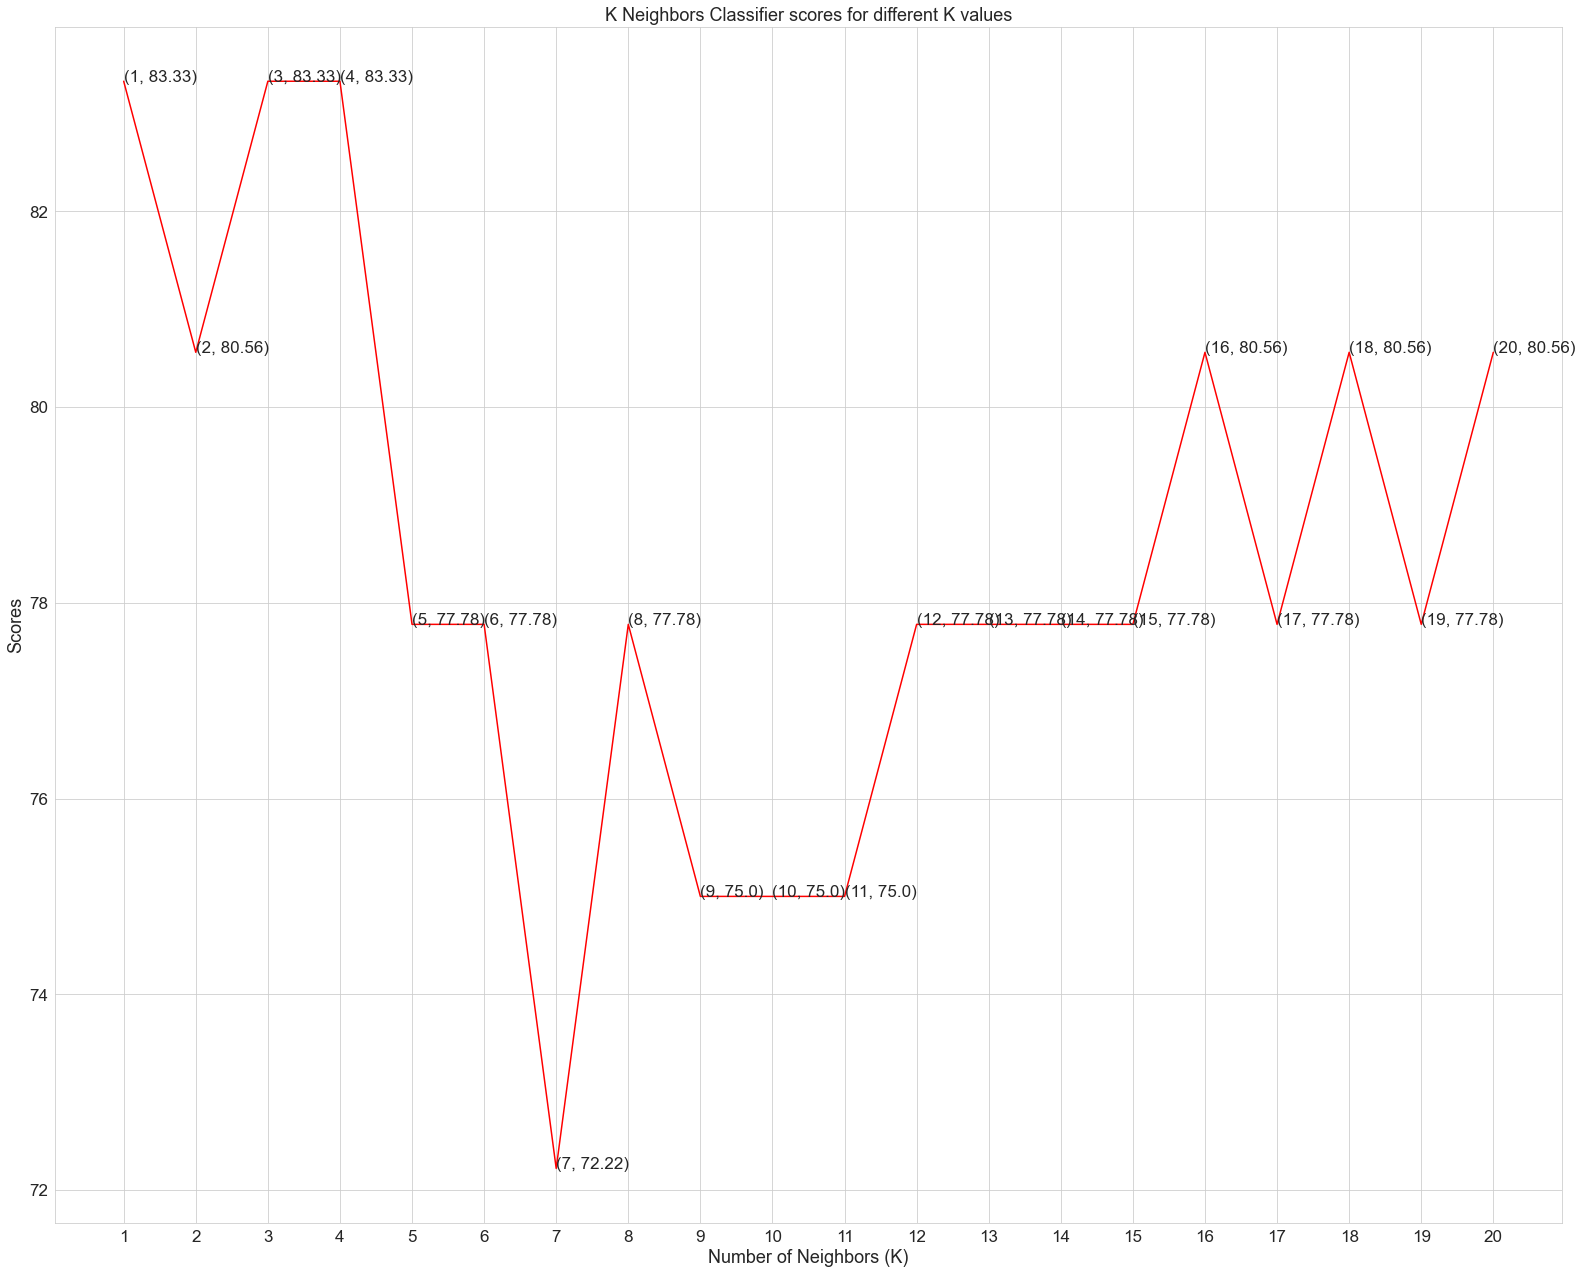

In [49]:
rcParams['figure.figsize'] = 27,22
plt.rcParams.update({'font.size': 17}) 
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)',fontsize=18)
plt.ylabel('Scores',fontsize=18)
plt.title('K Neighbors Classifier scores for different K values',fontsize=18)

### As you can see, we achieved the maximum score of 83.33 % when the number of neighbors was chosen to be 3 and 4.

# #SVM

In [50]:
from sklearn.svm import SVC

In [51]:
SVC_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#default kernel is rbf c=10 and gamma=0.1
for i in range(len(kernels)):
    SVC_model = SVC(kernel = kernels[i]) # here we try all kernels
    SVC_model.fit(X_train, y_train)
    y_SVC_predict = SVC_model.predict(X_test)
    SVC_scores.append(round(accuracy_score(y_test,y_SVC_predict)*100,2))

In [52]:
SVC_scores 

[77.78, 80.56, 77.78, 75.0]

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

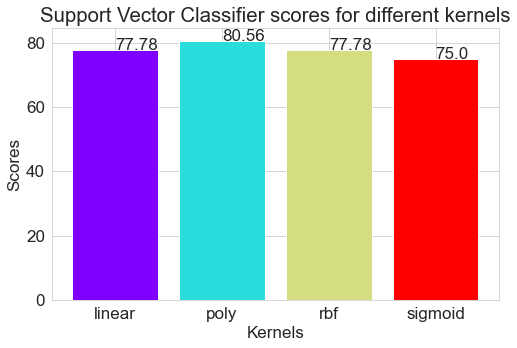

In [53]:
rcParams['figure.figsize'] = 8,5
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, SVC_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, SVC_scores[i], SVC_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

### As can be seen from the plot above, the Polynomial kernel performed the best for this dataset and achieved a score of 80.56 %.

# #Decision Tree


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
DT_scores = []
for i in range(1, len(X.columns) + 1): # X is table after applying dummy variable and standard scaler
    DT_model = DecisionTreeClassifier(max_features = i, random_state = 0)
    DT_model.fit(X_train,y_train)
    y_DT_predict = DT_model.predict(X_test)
    DT_scores.append(round(accuracy_score(y_test,y_DT_predict)*100,2))  
#we can vary the maximum number of features to be considered while creating the model. 
#We range features from 1 to 20 i.e. X.columns

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

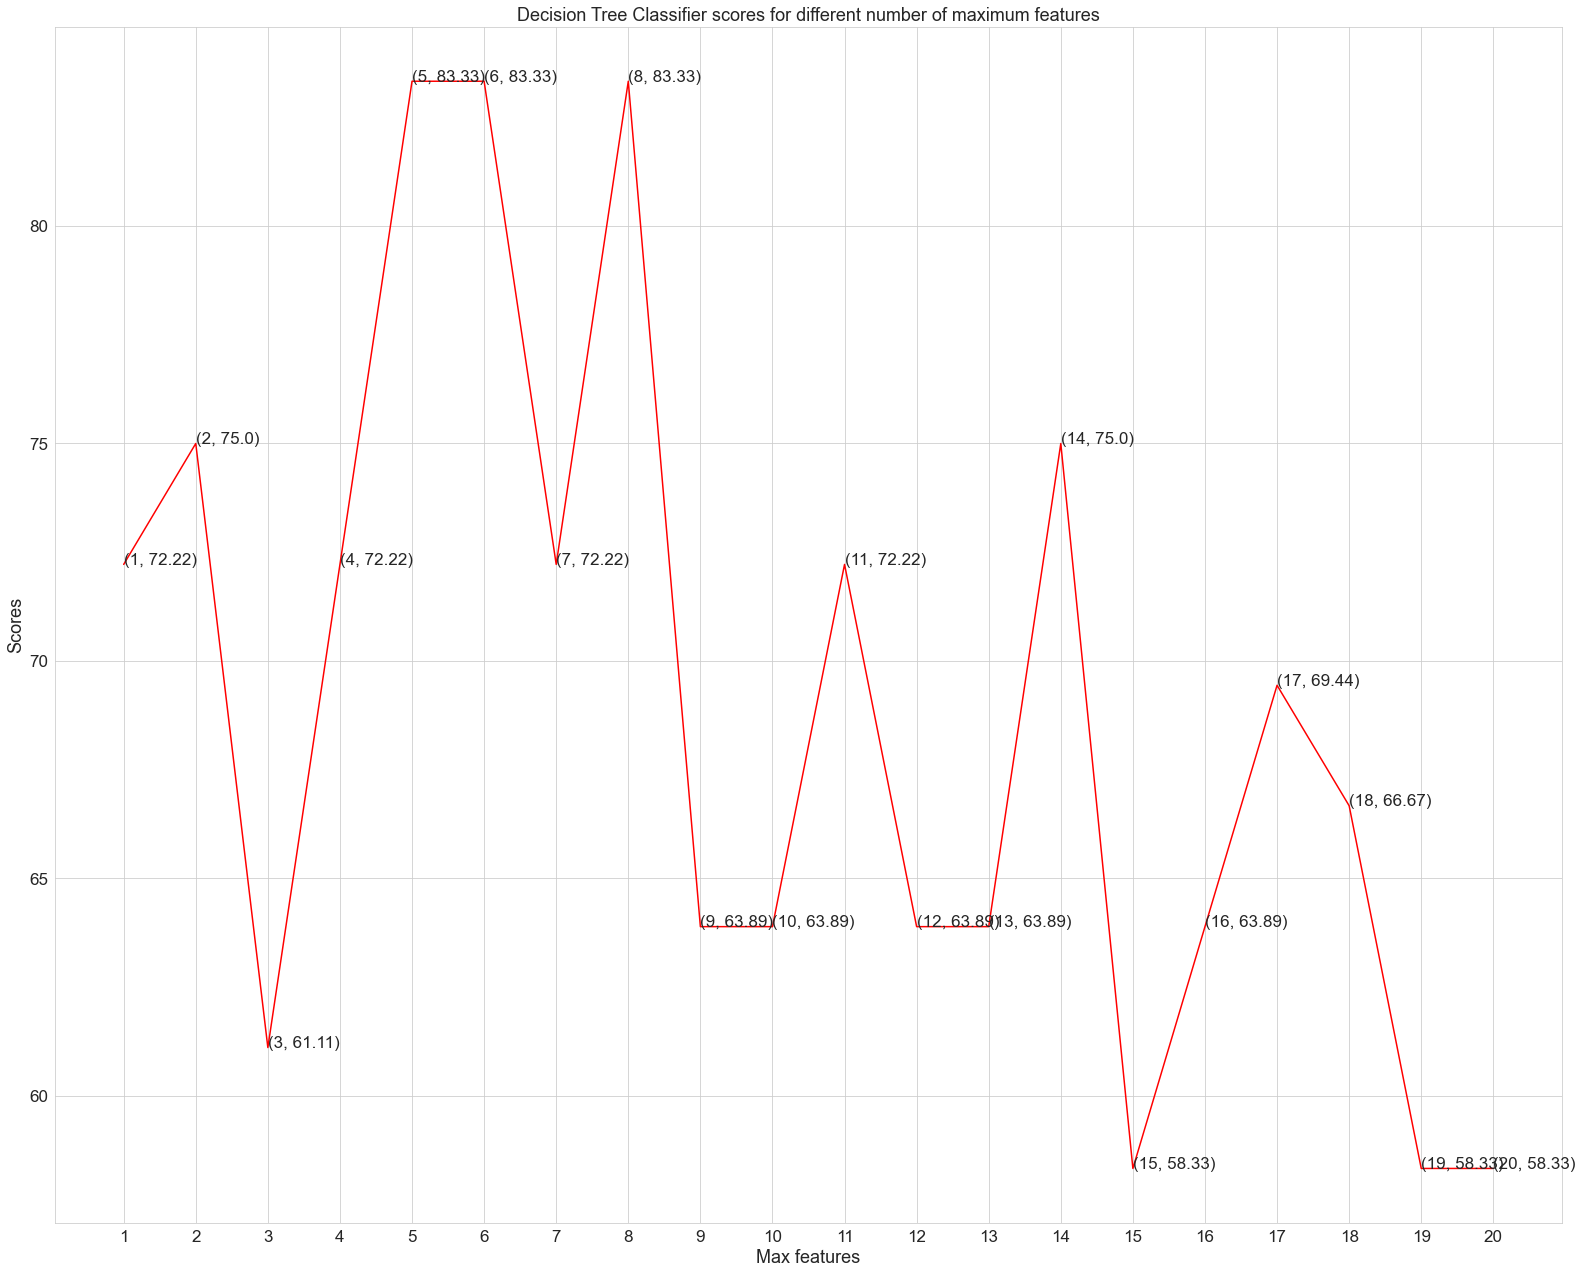

In [56]:
rcParams['figure.figsize'] = 27,22
plt.rcParams.update({'font.size': 17}) 
plt.plot([i for i in range(1, len(X.columns) + 1)], DT_scores, color = 'Red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, DT_scores[i-1], (i, DT_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features',fontsize=18)
plt.ylabel('Scores',fontsize=18)
plt.title('Decision Tree Classifier scores for different number of maximum features',fontsize=18)

### From the line graph above, we can clearly see that the maximum score is 83.33 % and is achieved for maximum features being selected to be either 5, 6 or 8.

# #Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF_scores = []
ests = [10, 100, 150, 200, 500]
for i in ests:
    RF_model =RandomForestClassifier(n_estimators=i, random_state = 0)
    RF_model.fit(X_train,y_train)
    y_RF_predict = RF_model.predict(X_test)
    RF_scores.append(round(accuracy_score(y_test,y_RF_predict)*100,2))

In [59]:
RF_scores

[75.0, 86.11, 86.11, 86.11, 77.78]

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

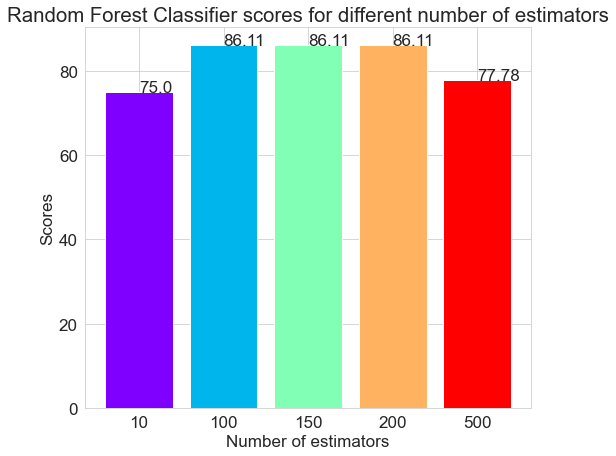

In [60]:
rcParams['figure.figsize'] = 8,7
colors = rainbow(np.linspace(0, 1, len(ests)))
plt.bar([i for i in range(len(ests))], RF_scores, color = colors)
for i in range(len(ests)):
    plt.text(i, RF_scores[i], RF_scores[i])
plt.xticks(ticks = [i for i in range(len(ests))], labels = [str(estimator) for estimator in ests])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

### Taking a look at the bar graph, we can see that the maximum score of 86.11 % is achieved for 100,150 and 200 estimators.

# #Conclusion :
## The project involved analysis of the heart disease patient dataset with proper data processing. Then, 5 models were trained and tested with maximum scores as follows:
### Logistic Regression          : 80.56 %
### K Neighbors Classifier      : 83.33 %
### Support Vector Classifier  : 80.56 %
### Decision Tree Classifier     : 83.33 %
### Random Forest Classifier  : 86.11 %

# Random Forest Classifier scored the best score of 86.11 % for 100,150 and 200 estimators.